<a href="https://colab.research.google.com/github/safaa400/safaasalah_46-17921_ML_assignments/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [2]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



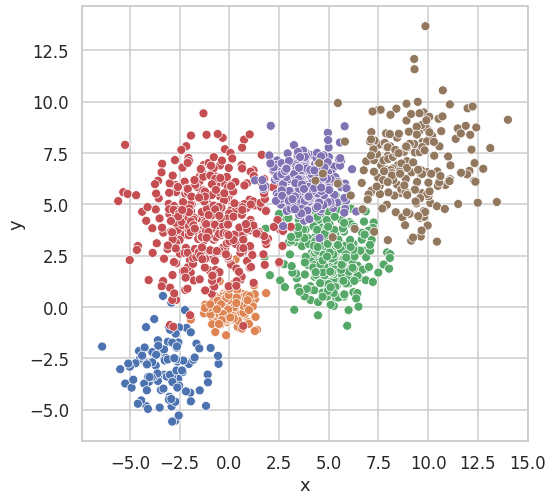

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
X_train,true_labels = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
# X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# display_cluster(X_train)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

SSE_values [36120.55102041719, 16716.61917540343, 12094.904429675615, 7812.226623315891, 5600.2945025784375] 
 k_values [1, 2, 3, 4, 5]


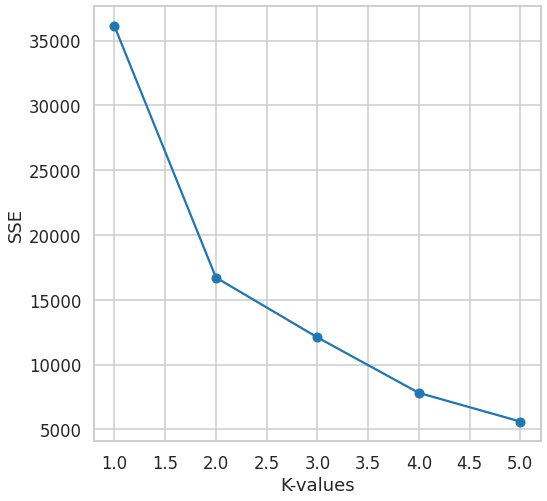

In [6]:
# k_means_4 = KMeans(n_clusters=4, random_state=4).fit(X_train)
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
SSE_values, k_values=find_best_clusters(X_train,6)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.show()

### Using the elbow method , k=4 is the optimal number of clusters 

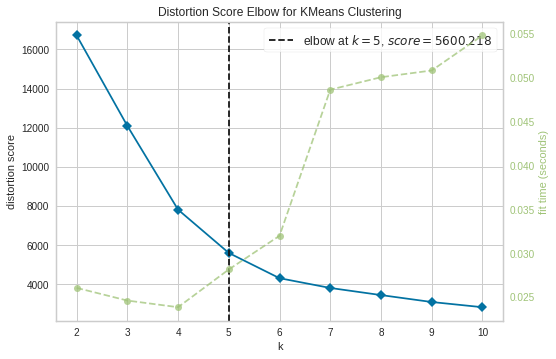

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

silhouette_scores [0.4751544541991239, 0.43631793714185435, 0.4628725400351352, 0.48092962827116337] 
 k_values [2, 3, 4, 5]


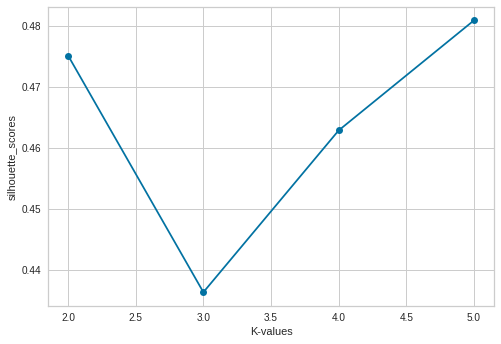

In [8]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

Using the silhouette method , k=5 is the optimal number of clusters 

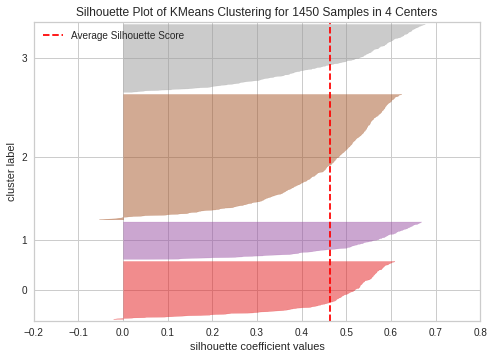

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

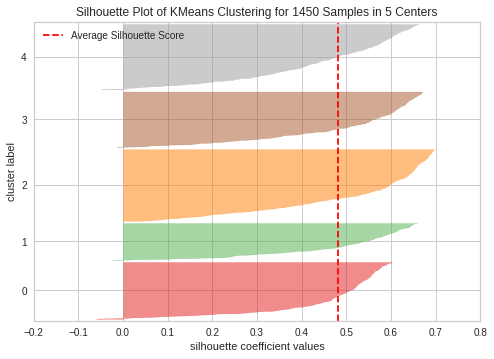

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
model_4clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

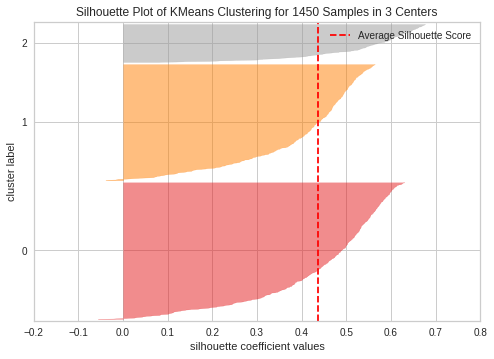

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
model_4clust = KMeans(n_clusters =3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch




## linkage 

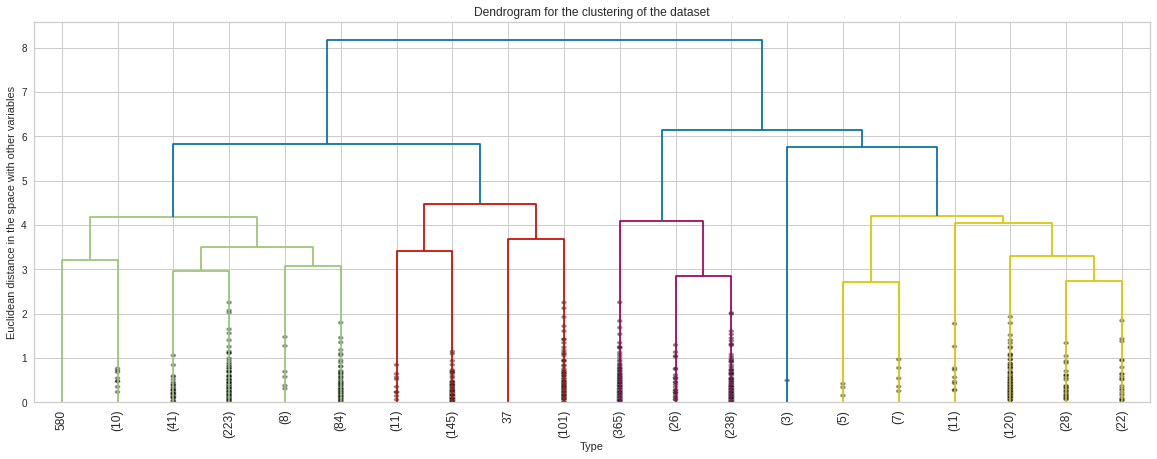

In [13]:
# Average Linkage - Average Distance between all points
Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True # to get a distribution impression in truncated branches 
)
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()


In [14]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 ... 0 0 0]
{0: 825, 1: 625}


In [15]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.4716908069861964


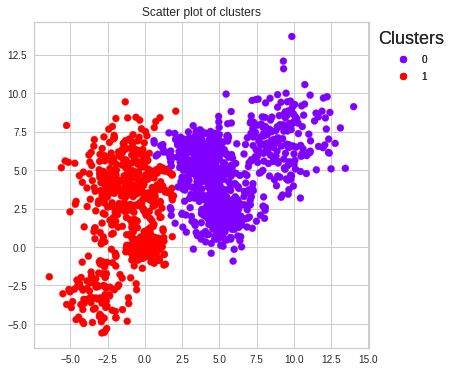

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---



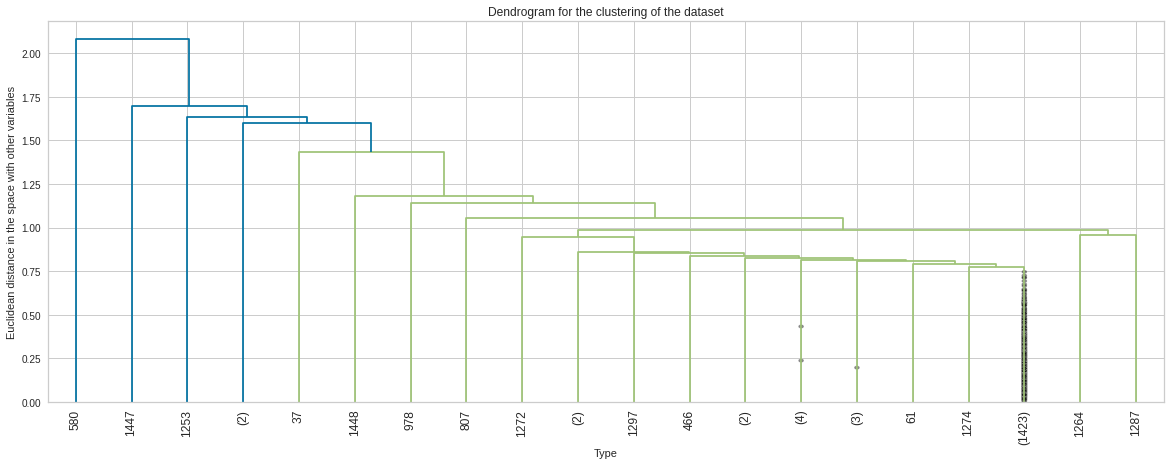

In [17]:
# Single linkage 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [18]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 ... 0 0 0]
{0: 1449, 1: 1}


In [19]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.3218066204847175


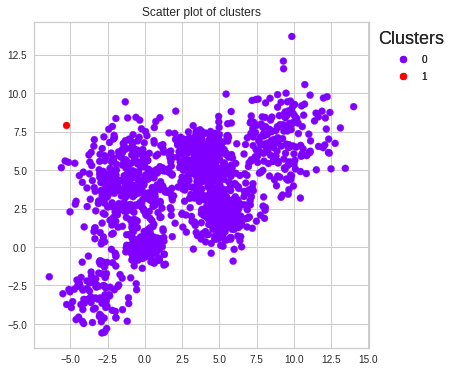

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---



From the above linkage approaches, apparently the average linkage is much better than the single one . 

In [21]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train)
clus_B = model1_B.fit(X_train)
clus_C = model1_C.fit(X_train)
clus_D = model1_D.fit(X_train)
clus_E = model1_E.fit(X_train)
clus_F = model1_F.fit(X_train)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [22]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 ... 0 0 0]
{0: 825, 1: 625}
Silhouette Score for model A
0.4716908069861964


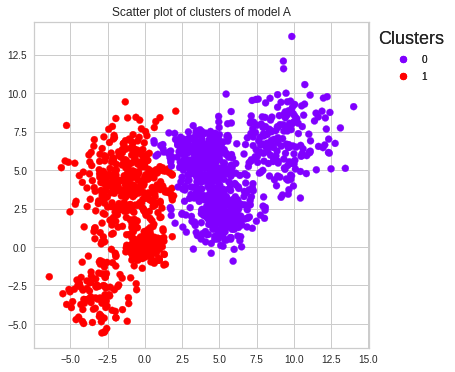

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [24]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[0 0 0 ... 1 1 1]
{0: 644, 1: 806}
Silhouette Score for model B
0.46762361386512785


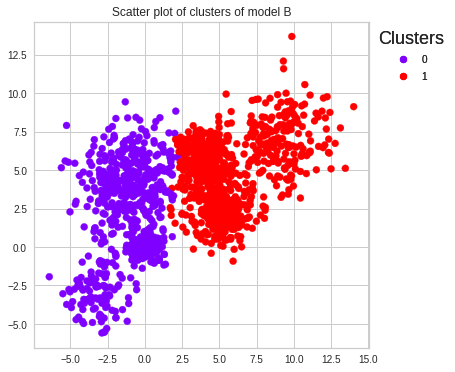

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [26]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 ... 1 1 1]
{0: 172, 1: 1278}
Silhouette Score for model C
0.35251834131557364


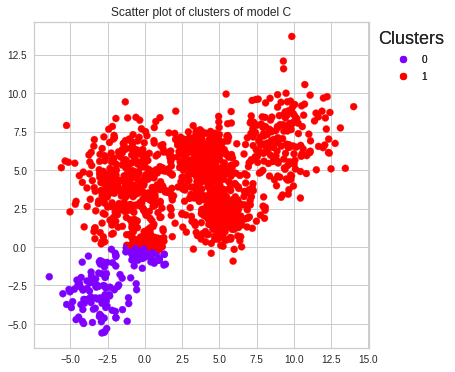

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [28]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[1192 1093  844 ...  153   93  261]
{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 3, 15: 3, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 1, 40: 2, 41: 2, 42: 1, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 1, 49: 2, 50: 2, 51: 1, 52: 1, 53: 2, 54: 2, 55: 3, 56: 2, 57: 2, 58: 1, 59: 2, 60: 2, 61: 1, 62: 1, 63: 2, 64: 2, 65: 2, 66: 2, 67: 1, 68: 2, 69: 1, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 1, 76: 2, 77: 2, 78: 2, 79: 1, 80: 1, 81: 2, 82: 1, 83: 2, 84: 2, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 2, 93: 1, 94: 1, 95: 2, 96: 1, 97: 1, 98: 1, 99: 1, 100: 2, 101: 1, 102: 2, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 2, 109: 2, 110: 1, 111: 1, 112: 2, 113: 1, 114: 1, 115: 2, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 2, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 2, 128: 2, 129: 1, 

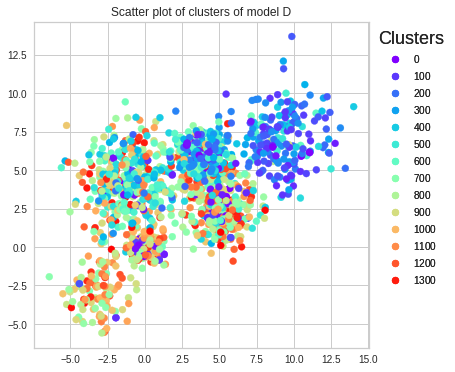

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

In [30]:
print('Output Clusters from model E are')
pred1 = clus_E.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model E')
print(silhouette_score(X_train,pred1))

Output Clusters from model E are
[252  70 111 ... 160 195 109]
{0: 3, 1: 7, 2: 17, 3: 19, 4: 3, 5: 9, 6: 10, 7: 19, 8: 8, 9: 3, 10: 5, 11: 7, 12: 3, 13: 4, 14: 6, 15: 2, 16: 22, 17: 6, 18: 5, 19: 4, 20: 4, 21: 3, 22: 2, 23: 13, 24: 10, 25: 12, 26: 2, 27: 5, 28: 8, 29: 5, 30: 12, 31: 12, 32: 3, 33: 18, 34: 2, 35: 9, 36: 7, 37: 2, 38: 10, 39: 4, 40: 4, 41: 7, 42: 9, 43: 12, 44: 16, 45: 5, 46: 4, 47: 2, 48: 11, 49: 15, 50: 5, 51: 4, 52: 4, 53: 5, 54: 12, 55: 5, 56: 6, 57: 5, 58: 2, 59: 6, 60: 2, 61: 12, 62: 3, 63: 19, 64: 19, 65: 6, 66: 3, 67: 3, 68: 2, 69: 6, 70: 3, 71: 13, 72: 2, 73: 18, 74: 5, 75: 8, 76: 6, 77: 4, 78: 11, 79: 4, 80: 4, 81: 6, 82: 25, 83: 2, 84: 21, 85: 9, 86: 3, 87: 3, 88: 5, 89: 9, 90: 4, 91: 5, 92: 4, 93: 3, 94: 2, 95: 2, 96: 8, 97: 6, 98: 2, 99: 24, 100: 28, 101: 3, 102: 14, 103: 3, 104: 4, 105: 9, 106: 3, 107: 6, 108: 26, 109: 7, 110: 2, 111: 4, 112: 4, 113: 8, 114: 4, 115: 5, 116: 3, 117: 3, 118: 2, 119: 6, 120: 4, 121: 12, 122: 7, 123: 8, 124: 9, 125: 2, 126: 4, 

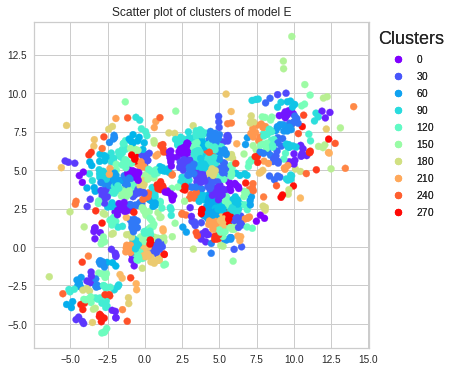

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model E')

plt.show()

In [32]:
print('Output Clusters from model F are')
pred1 = clus_F.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model F')
print(silhouette_score(X_train,pred1))

Output Clusters from model F are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model F
0.24927357773894548


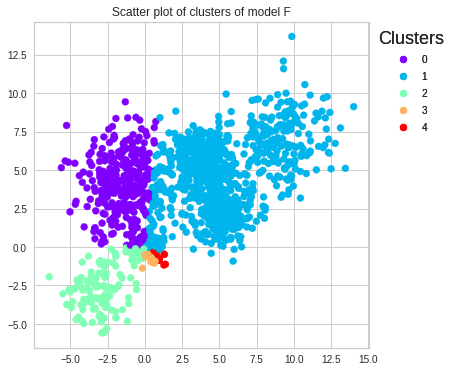

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model F')

plt.show()

In [34]:
print('Output Clusters from model G are')
pred1 = clus_G.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model G')
print(silhouette_score(X_train,pred1))

Output Clusters from model G are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model G
0.24927357773894548


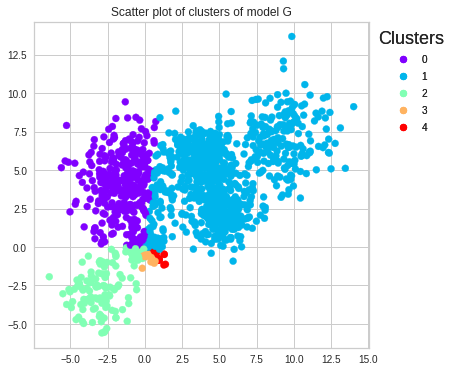

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model G')

plt.show()

In [36]:
print('Output Clusters from model H are')
pred1 = clus_H.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model H')
print(silhouette_score(X_train,pred1))

Output Clusters from model H are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model H
0.24927357773894548


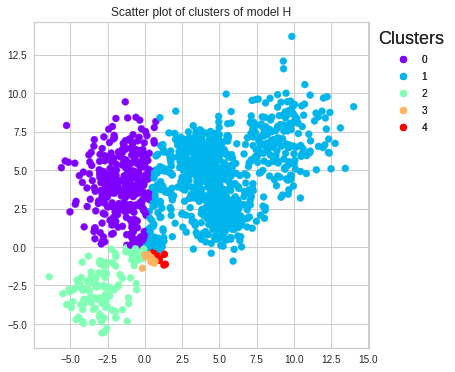

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model H')

plt.show()

## notes :
- optimal number of clusters is 2 in model A  where n_clusters=2, affinity='euclidean', linkage='average', and the resuting  silhouette_score is  0.4716908069861964 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [38]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)







___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 1380, 0: 9, 1: 7, 2: 5, 3: 7, 4: 9, 5: 6, 6: 5, 7: 5, 8: 5, 9: 7, 10: 5}
Silhouette Score
-0.5423348432605972
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output

[ 0  0  0 ... -1  0  0]
{-1: 1, 0: 1449}
Silhouette Score
0.4685207355522043


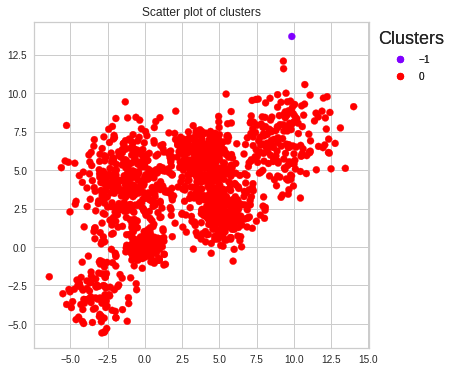

In [39]:
dbscan = DBSCAN(eps =3,min_samples =25).fit(X_train)
pred1 = dbscan.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score')
print(silhouette_score(X_train,pred1))
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

## Notes 
- optimal number of clusters is 2 , when eps= 3 and min_samples=25 ,with Silhouette Score
0.4685207355522043

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [40]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data 
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [41]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['species'] = iris_data.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# Kmeans

- Elbow Method

SSE_values [681.3706, 152.3479517603579, 78.851441426146, 57.25600931571816, 46.446182051282065, 39.03998724608726] 
 k_values [1, 2, 3, 4, 5, 6]


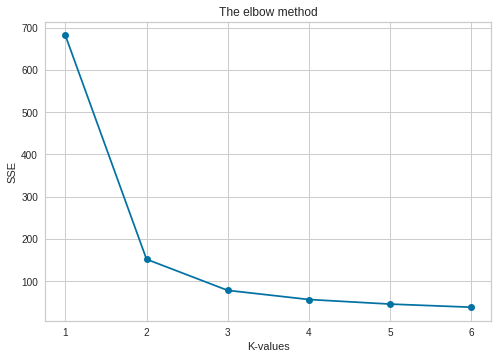

In [42]:
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
X_train=df.iloc[:,[0,1,2,3]].values
SSE_values, k_values=find_best_clusters(X_train,7)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.title('The elbow method')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.show()

- by using elbow method , k=3 is the optimal number of clusters

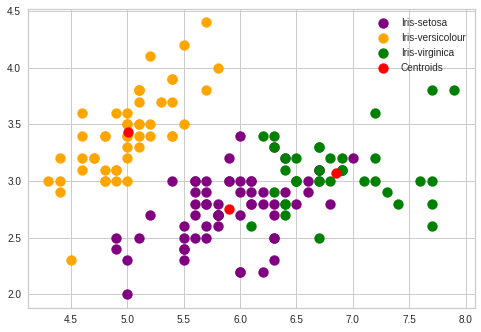

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

- silhouette_scores

silhouette_scores [0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566] 
 k_values [2, 3, 4, 5]


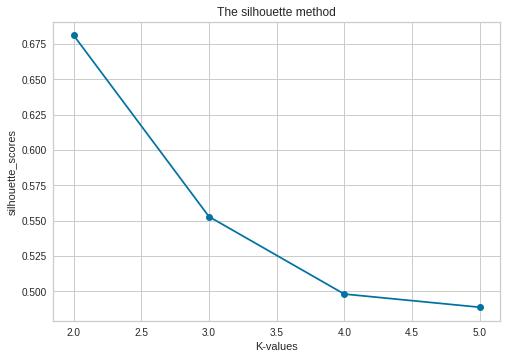

In [44]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

- By using silhouette_score method , k=2 is the optimal number of clusters 

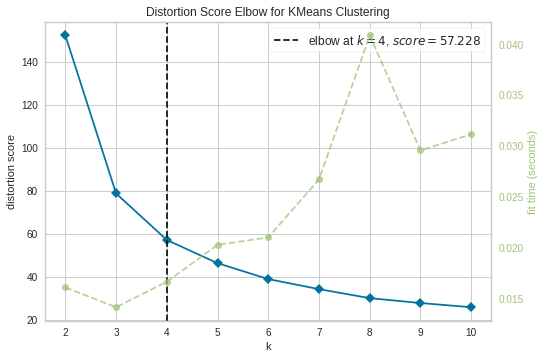

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

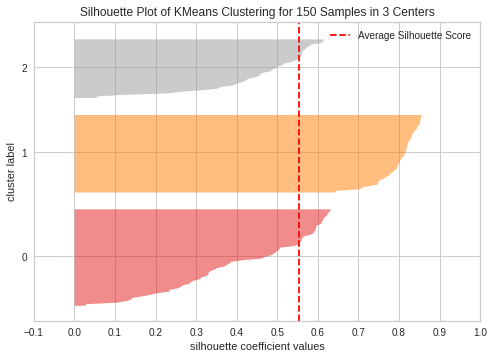

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

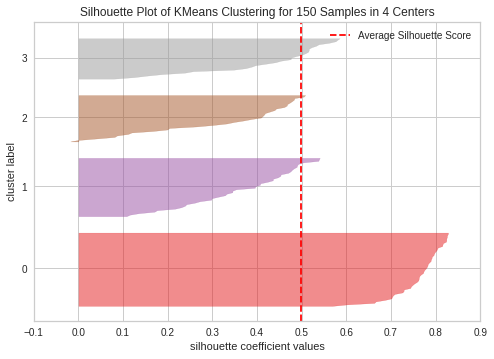

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()



---
## Hirarical clustering 


- linkage 

Text(0, 0.5, 'Euclidean distance in the space with other variables')

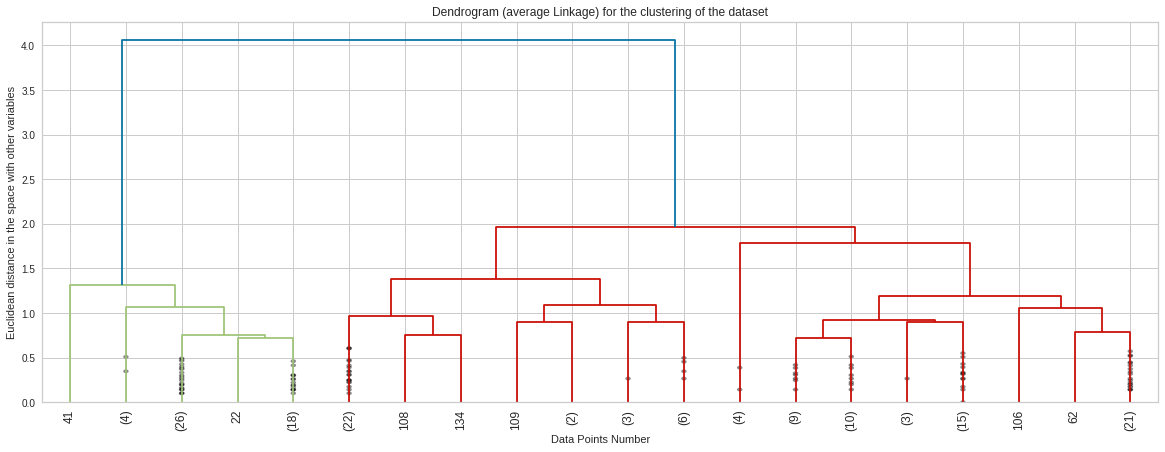

In [48]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

In [49]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [50]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.6867350732769777


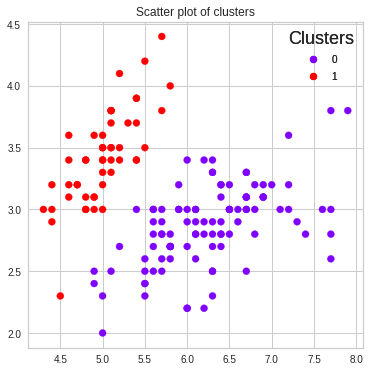

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

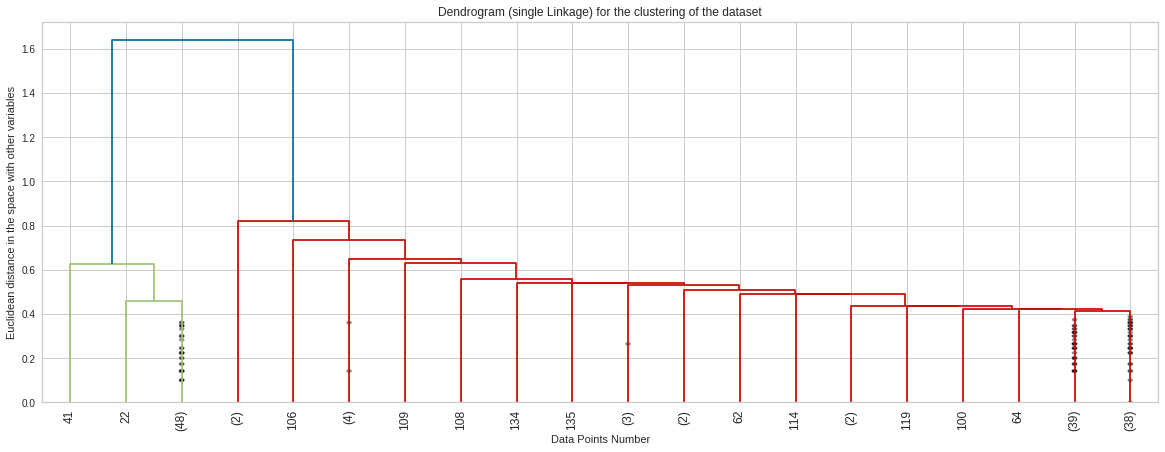

In [52]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

## Customer dataset
Repeat all the above on the customer data set 